**4.4 IMDB dataset**

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras import backend as K

In [2]:
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 500

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Reverse sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
K.clear_session()

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
137/137 [==============================] - 65s 245ms/step - loss: 0.6340 - acc: 0.6034 - val_loss: 0.3814 - val_acc: 0.8447
Epoch 2/15
137/137 [==============================] - 32s 231ms/step - loss: 0.2927 - acc: 0.8875 - val_loss: 0.3284 - val_acc: 0.8756
Epoch 3/15
137/137 [==============================] - 31s 223ms/step - loss: 0.1781 - acc: 0.9406 - val_loss: 0.3648 - val_acc: 0.8735
Epoch 4/15
137/137 [==============================] - 30s 222ms/step - loss: 0.1311 - acc: 0.9575 - val_loss: 0.3578 - val_acc: 0.8725
Epoch 5/15
137/137 [==============================] - 30s 221ms/step - loss: 0.1241 - acc: 0.9600 - val_loss: 0.4506 - val_acc: 0.8629
Epoch 6/15
137/137 [==============================] - 30s 222ms/step - loss: 0.0983 - acc: 0.9692 - val_loss: 0.4396 - val_acc: 0.8636
Epoch 7/15
137/137 [==============================] - 31s 229ms/step - loss: 0.0764 - acc: 0.9788 - val_loss: 0.5008 - val_acc: 0.8577
Epoch 8/15
137/137 [==============================] - 3

**4.5 DJIA Prediction**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import pandas_datareader.data as web

In [5]:
DJIA = web.DataReader('^DJI', data_source='yahoo', start='2015-01-01')
print(DJIA.head(10))
print(DJIA.columns)

                    High           Low  ...     Volume     Adj Close
Date                                    ...                         
2015-01-02  17951.779297  17731.300781  ...   76270000  17832.990234
2015-01-05  17821.300781  17475.929688  ...  116160000  17501.650391
2015-01-06  17581.050781  17262.369141  ...  101870000  17371.640625
2015-01-07  17597.080078  17374.779297  ...   91030000  17584.519531
2015-01-08  17916.039062  17591.970703  ...  114890000  17907.869141
2015-01-09  17915.320312  17686.089844  ...   93390000  17737.369141
2015-01-12  17793.880859  17571.580078  ...   92500000  17640.839844
2015-01-13  17923.009766  17498.230469  ...   99360000  17613.679688
2015-01-14  17609.060547  17264.900391  ...  109180000  17427.089844
2015-01-15  17517.410156  17298.039062  ...   94520000  17320.710938

[10 rows x 6 columns]
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


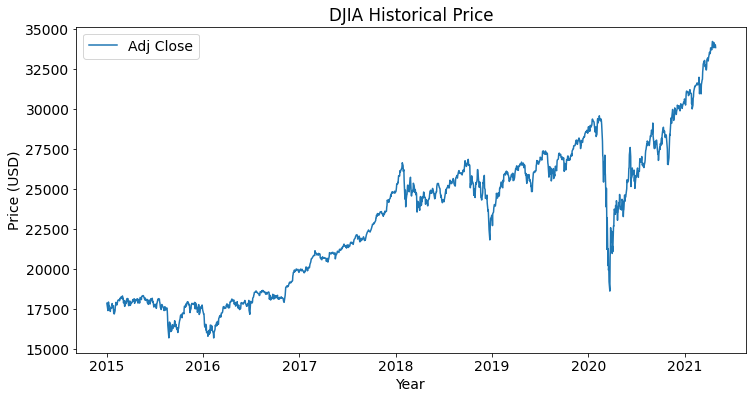

In [6]:
plt.figure(figsize=(12,6))
plt.plot(DJIA['Adj Close'])
plt.title('DJIA Historical Price')
plt.ylabel('Price (USD)')
plt.xlabel('Year')
plt.legend(['Adj Close'], loc='best')
plt.show()

In [7]:
DJIA = DJIA.reset_index()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler_single = MinMaxScaler(feature_range = (0, 1))

scaled_data = np.concatenate([scaler.fit_transform(DJIA[['Open', 'High', 'Low']]), 
                                  scaler_single.fit_transform(DJIA[['Close']])], axis = 1)

In [11]:
scaled_data

array([[0.11600544, 0.11187793, 0.12633734, 0.11719271],
       [0.11590982, 0.10477084, 0.11267224, 0.09932157],
       [0.09877381, 0.09168456, 0.10124445, 0.09230936],
       ...,
       [0.99253499, 0.99412773, 0.99375053, 0.98818254],
       [0.98647745, 0.98841057, 0.98995607, 0.98836373],
       [0.98260478, 0.9831064 , 0.9864831 , 0.97948852]])

In [12]:
X = scaled_data[:, :3]
y = scaled_data[:, -1:]

In [51]:
X.shape

(1591, 3)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1065, 1, 3)
(526, 1, 3)
(1065, 1)
(526, 1)


In [67]:
K.clear_session()

model=Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(None, 3)))
model.add(LSTM(70, return_sequences=True))
model.add(LSTM(2, return_sequences=True))
model.add(Dense(1))

model.summary()

model.compile(optimizer='adam',
              loss='mean_squared_error')

history=model.fit(X_train,y_train,
                  validation_data=(X_test, y_test),
                  epochs=30,
                  batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 100)         41600     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 70)          47880     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 2)           584       
_________________________________________________________________
dense (Dense)                (None, None, 1)           3         
Total params: 90,067
Trainable params: 90,067
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
17/17 [==============================] - 6s 83ms/step - loss: 0.2152 - val_loss: 0.1755
Epoch 2/30
17/17 [==============================] - 0s 12ms/step - loss: 0.1686 - val_loss: 0.1099
Epoch 3/30
17/17 [==============================] - 

In [59]:
X_train.shape

(1065, 1, 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


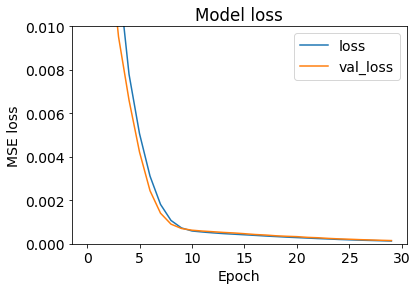

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("MSE loss")
plt.xlabel("Epoch")
plt.legend(['loss','val_loss'],loc='best')
axes = plt.axes()
axes.set_ylim([0, 0.01])
plt.show()

In [23]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

real_train_price = scaler_single.inverse_transform(train_pred)
real_test_price = scaler_single.inverse_transform(test_pred)

real_y_train = scaler_single.inverse_transform(y_train)
real_y_test = scaler_single.inverse_transform(y_test)

In [27]:
import math
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, train_pred))
print(mean_squared_error(real_y_train, real_train_price))

print(mean_squared_error(y_test, test_pred))
print(mean_squared_error(real_y_test, real_test_price))

8.122051003559655e-05
27919.561612583213
9.634711343155057e-05
33119.32057173083


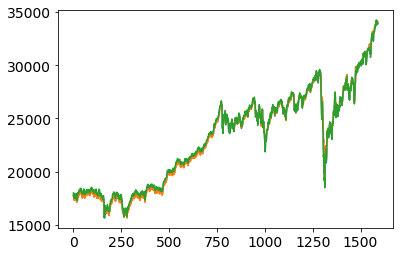

In [34]:
plt.plot(scaler_single.inverse_transform(X))

In [80]:
pred_model=Sequential()
pred_model.add(LSTM(100, stateful= True, return_sequences=True, batch_input_shape=(1, None, 3)))
pred_model.add(LSTM(70, return_sequences=True, stateful=True))
pred_model.add(LSTM(2, return_sequences=False, stateful=True))
pred_model.add(Dense(1))

pred_model.set_weights(model.get_weights())

pred_model.reset_states()

predictions = pred_model.predict(X_train)

future = []
current_step = predictions[:, -1:] #last step from the previous prediction

future_pred_count = 5

for i in range(future_pred_count):
    current_step = pred_model.predict(current_step, 3) #get the next step
    future.append(current_step) #store the future steps    


print(future)

#model.reset_states()

ValueError: ignored